In [38]:
import pandas as pd
import numpy as np
import os
import csv
import gzip
import sys
import datetime
import ast
import matplotlib.pyplot as plt
import scipy.stats as SSA
from scipy.stats import gaussian_kde

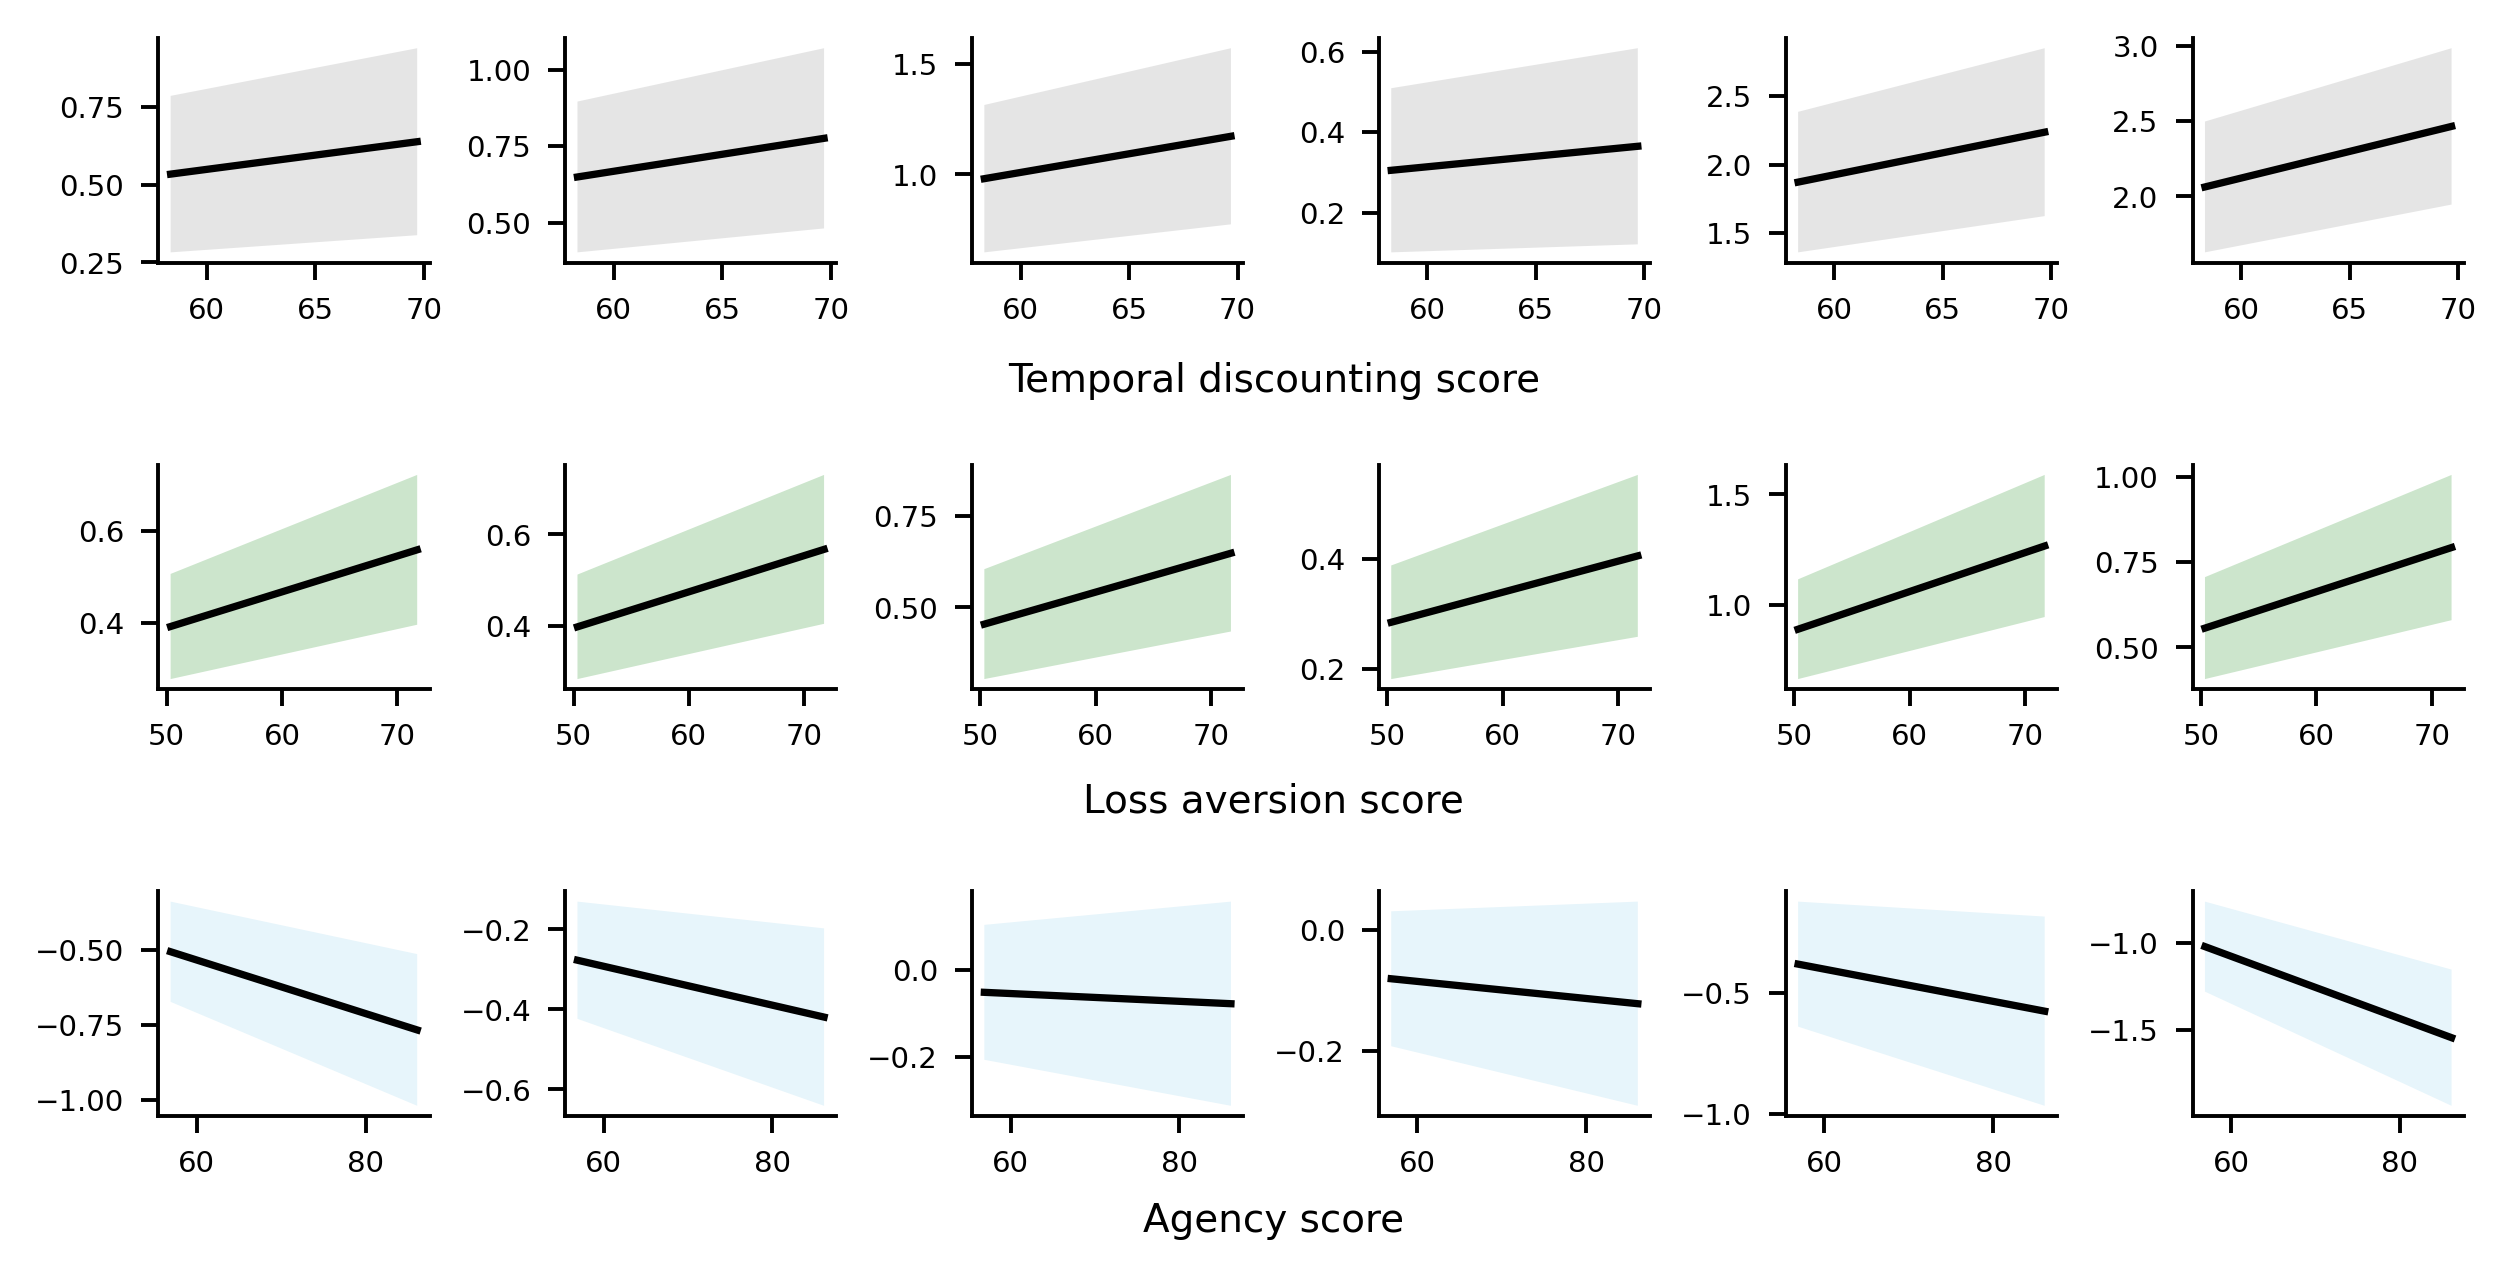

In [40]:
# linear_vars_ls = ["temporal_discounting_score","loss_aversion_score",'agency_score', 
                                #  'stringency_index',"no_health_insurance_rate","no_vehicle_household_rate", "household_income", "percent_people_own_bachelor_degrees", 
                                #  "weighted_average_age"]
linear_vars_ls = ["temporal_discounting_score","loss_aversion_score",'agency_score']
depend_var_ls = ['Grocery_and_Pharmacy', 'General_Retail', 
                        'Art_and_Entertainment', 'Restaurant_and_Bar',
                        'Education', 'Healthcare']
color_dict = {"temporal_discounting_score":'grey',"loss_aversion_score":'green','agency_score':'skyblue'}

fig, axs = plt.subplots(3, 6, figsize=(8.5, 4), dpi=350)
plt.subplots_adjust(wspace=0.5, hspace=0.9)
for j in range(6):
    depend_var = depend_var_ls[j]
    # print(depend_var) 1to1 loss_visitors
    df_dependence = pd.read_csv('../results/gam_model_1tomore/{}_linear_term_dependence.csv'.format(depend_var))
    df_dependence = df_dependence.dropna()
    df_dependence = df_dependence.drop_duplicates()
    
    for i in range(3):
        var = linear_vars_ls[i]
        # print(var)
        df_i = df_dependence[df_dependence['variable'] == var].copy()
        df_i = df_i.sort_values(by='x_original')
        axs[i,j].fill_between(df_i['x_original'],df_i['upper'],df_i['lower'], alpha=0.2, color=color_dict[var],edgecolor=None)
        axs[i,j].plot(df_i['x_original'], df_i['fit'], label = var,c='black')
        # axs[i,j].scatter(df_i['x_original'], df_i['fit'], label = var,c='black')
        # axs[i,j].set_xlabel(var, fontsize=6)
        # if j == 2:
        #     axs[i,j].set_xlabel(var, fontsize=8)
        axs[i,j].spines['top'].set_visible(False)
        axs[i,j].spines['right'].set_visible(False)
        # axs[i].spines['left'].set_linewidth(0.5)  # Left spine with thinner line
        # axs[i].spines['bottom'].set_linewidth(0.5) 
        axs[i,j].tick_params(axis='both', which='major', labelsize=6)
row_names_ls = ["Agency score","Loss aversion score","Temporal discounting score"]
for i in range(3):
    fig.text(0.5, 0.035+i * 0.3, row_names_ls[i], ha='center', va='center', fontsize=8)

# plt.tight_layout() 1to1
plt.savefig('../results/gam_model_1tomore/score_dependence.png',pad_inches=0,dpi=350,bbox_inches='tight')

In [29]:
linear_vars_ls = ['week', 'log_borough_case_count',"temporal_discounting_score","loss_aversion_score",'agency_score', 'stringency_index',"no_health_insurance_rate","no_vehicle_household_rate", "household_income", "percent_people_own_bachelor_degrees", "weighted_average_age",'log_y_lag1']
# linear_vars_ls = ["temporal_discounting_score","loss_aversion_score",'agency_score']["temporal_discounting_score","loss_aversion_score",'agency_score']
depend_var_ls = ['Grocery_and_Pharmacy', 'General_Retail', 
                        'Art_and_Entertainment', 'Restaurant_and_Bar',
                        'Education', 'Healthcare']
# color_dict = {"temporal_discounting_score":'grey',"loss_aversion_score":'green','agency_score':'skyblue'}
depend_var_title = {'Grocery_and_Pharmacy':'Grocery Stores/Pharmacy', 'General_Retail':'General Retail', 
                        'Art_and_Entertainment':'Arts/Entertainment', 'Restaurant_and_Bar':'Restaurants/Bars',
                        'Education':'Educational Settings', 'Healthcare':'Healthcare Facilities'}

Grocery_and_Pharmacy
General_Retail
Art_and_Entertainment
Restaurant_and_Bar
Education
Healthcare


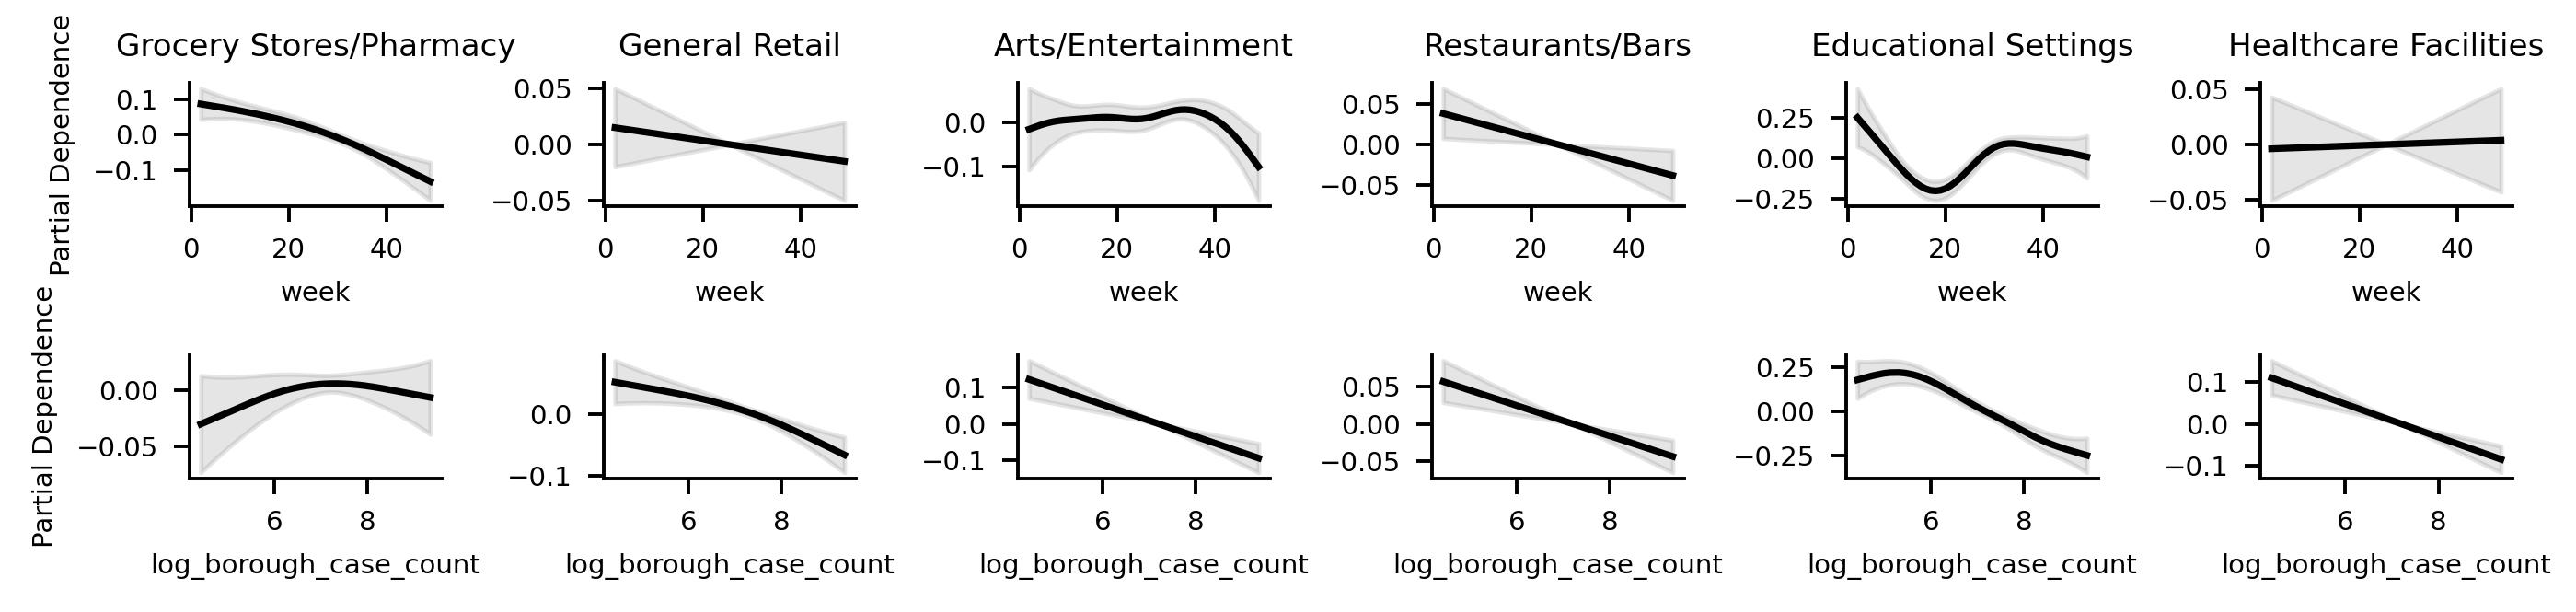

In [37]:
n_row = len(linear_vars_ls) #2 #len(linear_vars_ls)
fig, axs = plt.subplots(n_row, 6, figsize=(8, 1.*n_row), dpi=350)
plt.subplots_adjust(wspace=0.3,hspace=0.2)
for j in range(6):
    depend_var = depend_var_ls[j]
    print(depend_var)
    df_dependence = pd.read_csv('../results/gam_model_1to1/{}_linear_term_dependence.csv'.format(depend_var))
    df_dependence = df_dependence.dropna()
    df_dependence = df_dependence.drop_duplicates()
    axs[0, j].set_title(depend_var_title[depend_var], fontsize=7)
    for i in range(n_row):
        var = linear_vars_ls[i]
        # print(var)
        df_i = df_dependence[df_dependence['variable'] == var].copy()
        df_i = df_i.sort_values(by='x_original')
        axs[i,j].fill_between(df_i['x_original'],df_i['upper'],df_i['lower'], alpha=0.2, edgecolor=None, color='grey')
        if var == 'percent_people_own_bachelor_degrees':
            var = 'bachelor_rate'
        axs[i,j].plot(df_i['x_original'], df_i['fit'], label = var,c='black')
        # axs[i,j].scatter(df_i['x_original'], df_i['fit'], label = var,c='black')
        axs[i,j].set_xlabel(var, fontsize=6)
        axs[i,j].spines['top'].set_visible(False)
        axs[i,j].spines['right'].set_visible(False)
        # axs[i].spines['left'].set_linewidth(0.5)  # Left spine with thinner line
        # axs[i].spines['bottom'].set_linewidth(0.5) 
        axs[i,j].tick_params(axis='both', which='major', labelsize=6)

        if j == 0:
            axs[i, 0].set_ylabel('Partial Dependence', fontsize=6)

plt.tight_layout()
plt.savefig('../results/gam_model_1to1/k_9_dependence.png',dpi=350, bbox_inches='tight',pad_inches=0)

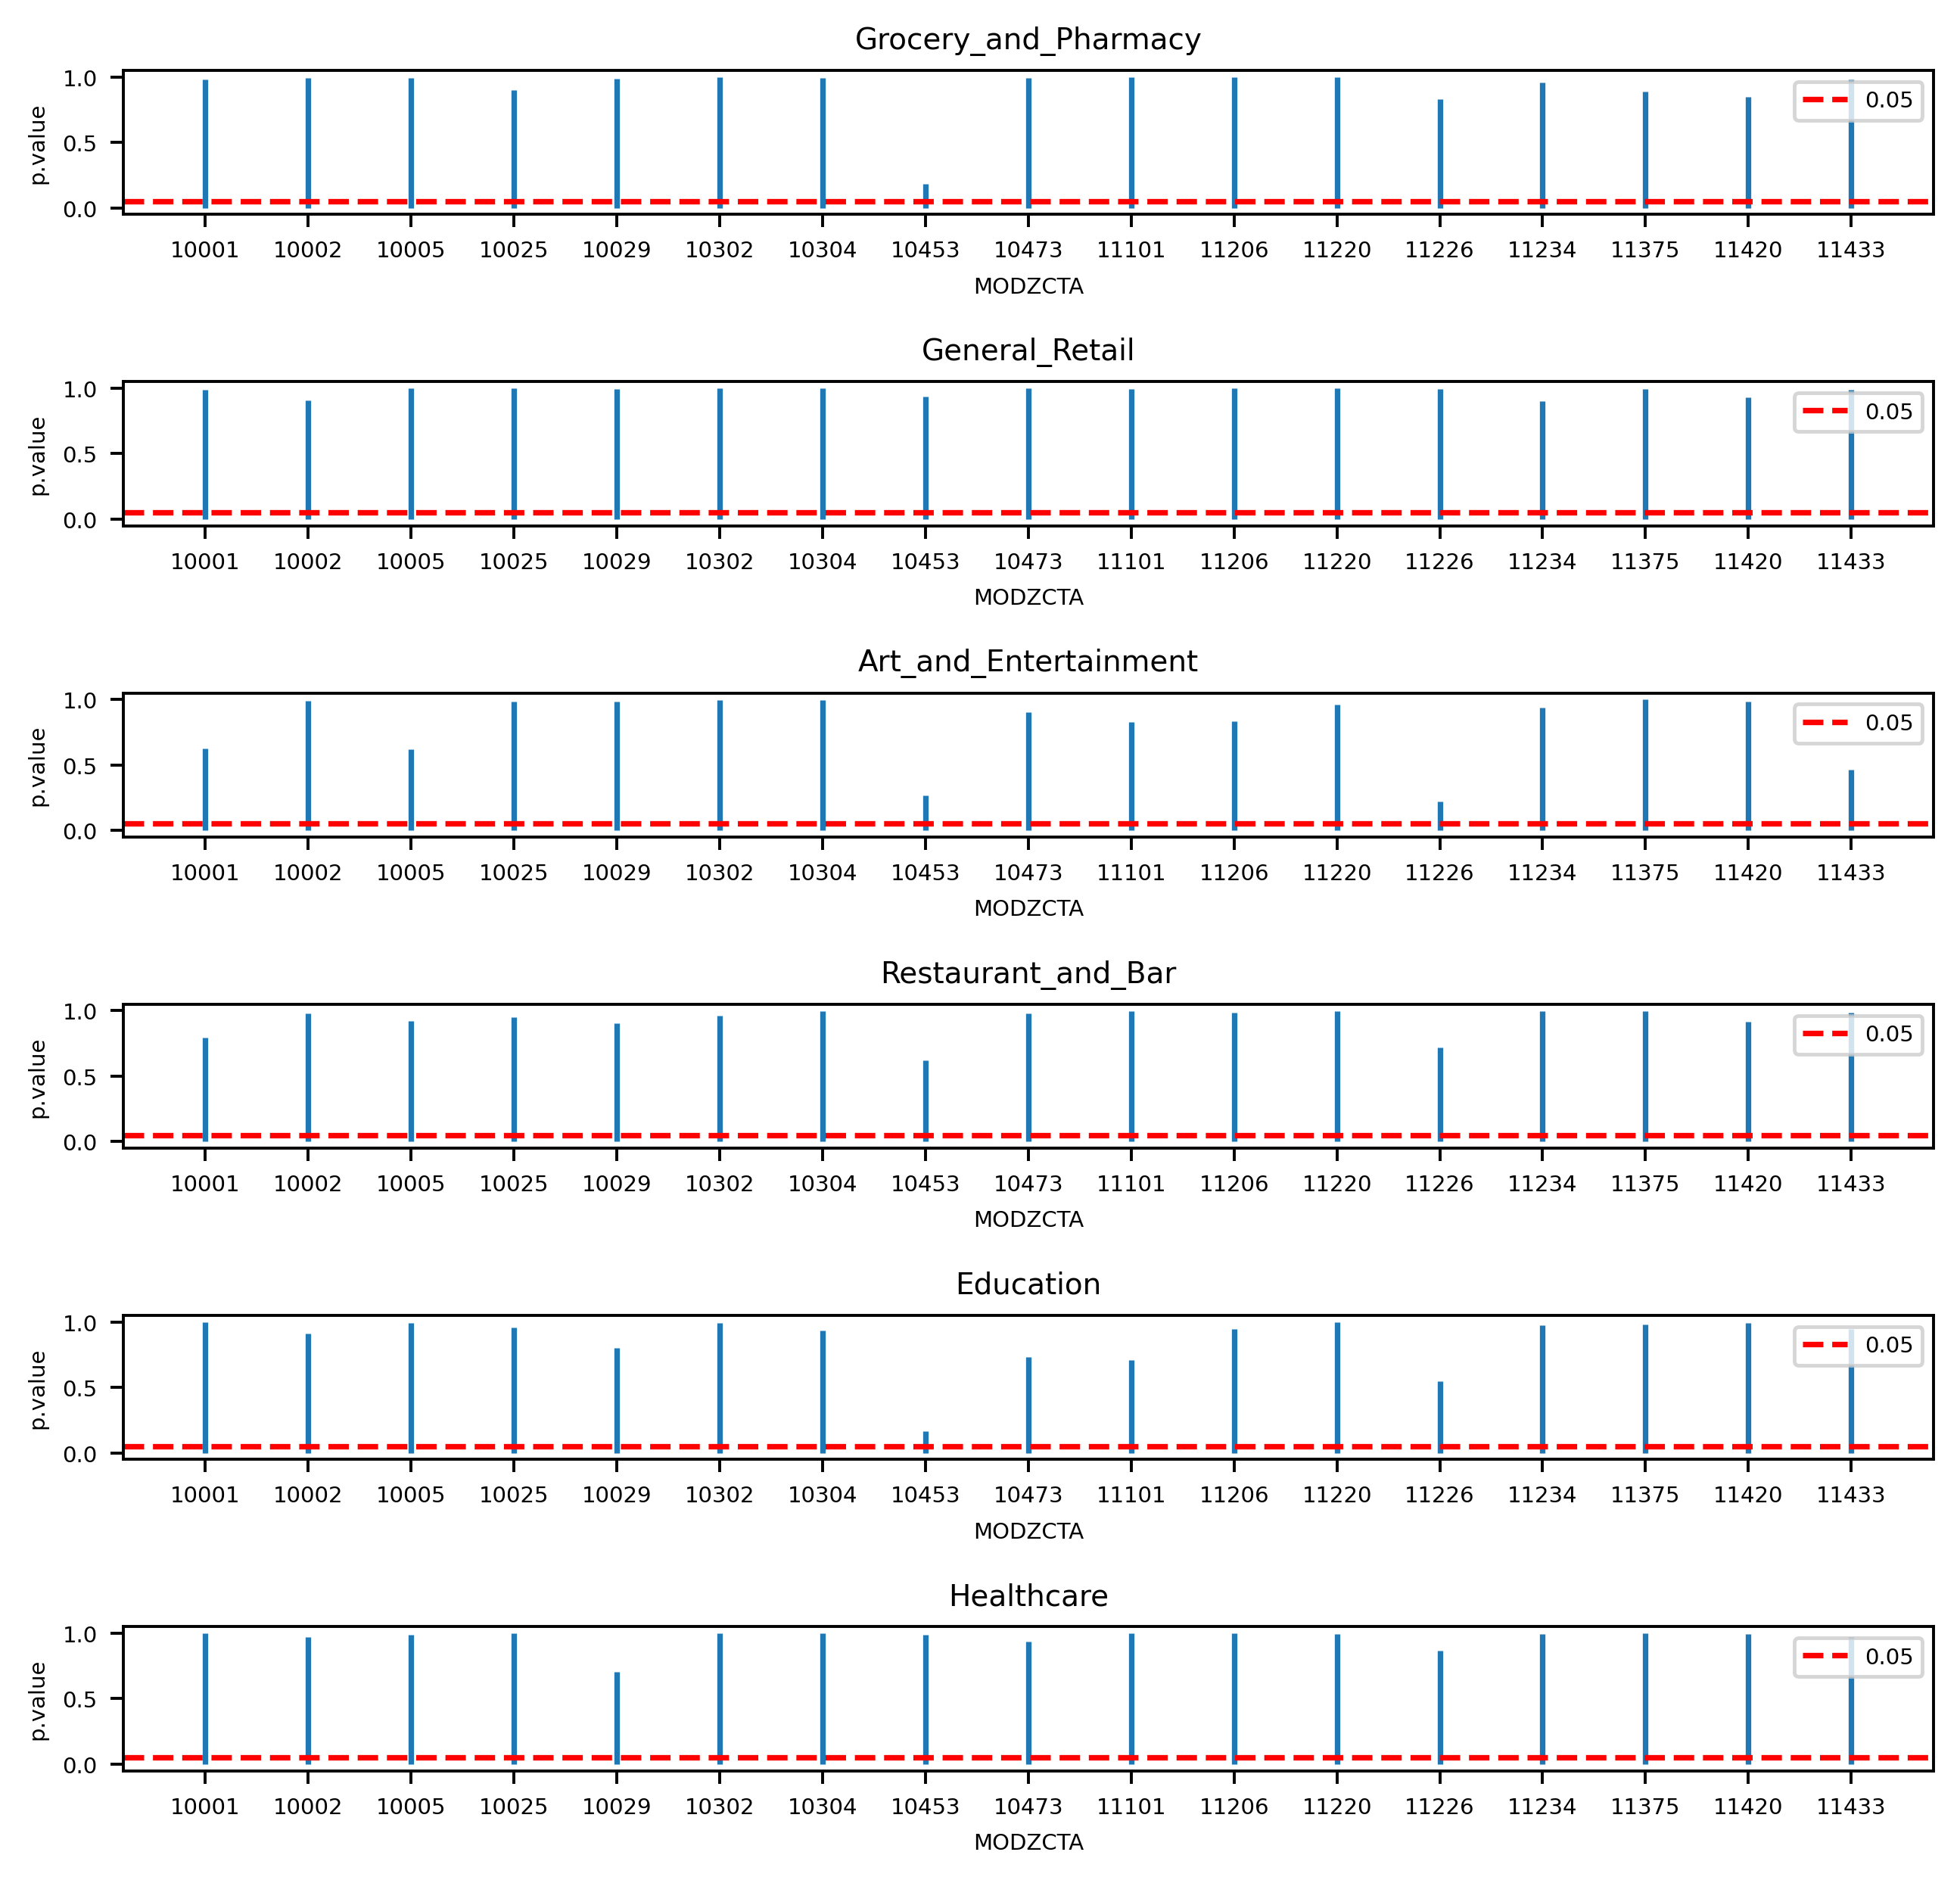

In [33]:
fig, axs = plt.subplots(6, 1, figsize=(7.5, 1.2*6), dpi=350)
plt.subplots_adjust(wspace=0.8)
for j in range(6):
    depend_var = depend_var_ls[j]
    df_residual = pd.read_csv('../results/gam_model_1to1/{}_residuals_summary.csv'.format(depend_var))
    x_values = df_residual['MODZCTA']
    y_values = df_residual['p.value']

    # Plotting the vertical lines
    for i, value in enumerate(y_values):
        axs[j].vlines(i, 0, value, colors='tab:blue', linestyles='solid')

# Customizing the x-axis labels
    axs[j].axhline(y=0.05, color='r', linestyle='--', label='0.05')
    axs[j].set_xticks(range(len(x_values)))
    axs[j].set_xticklabels(x_values)

# Setting axis labels
    axs[j].set_xlabel('MODZCTA', fontsize=6)
    axs[j].set_ylabel('p.value', fontsize=6)
    axs[j].tick_params(axis='both', which='major', labelsize=6)
# Setting the title for the plot
    axs[j].set_title('{}'.format(depend_var), fontsize=8)    
    axs[j].legend(fontsize=6)

# plt.show()

plt.tight_layout()
plt.savefig('../results/gam_model_1to1/residual_autocorrelations.png',dpi=350, bbox_inches='tight')